C:\Users\young0tete\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\young0tete\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


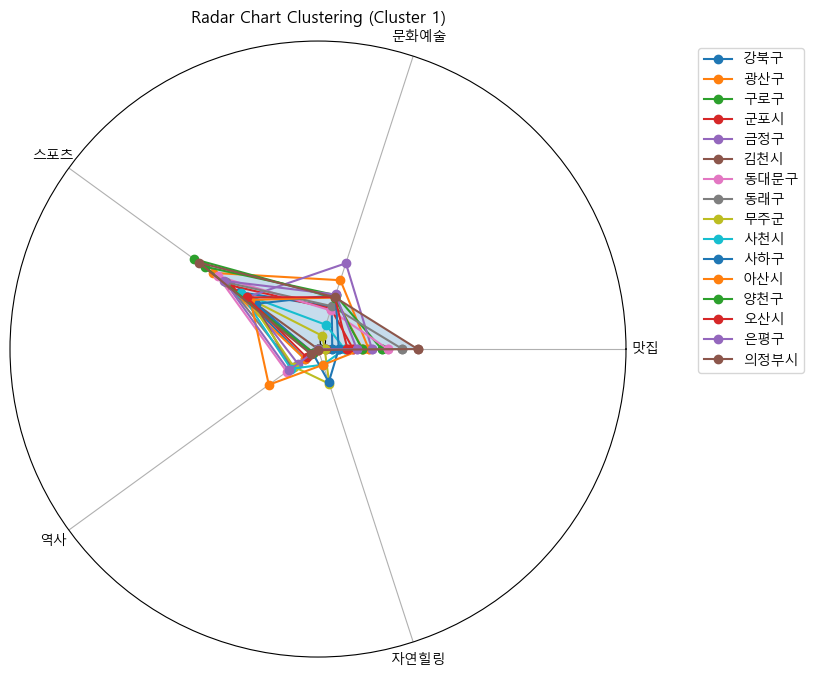

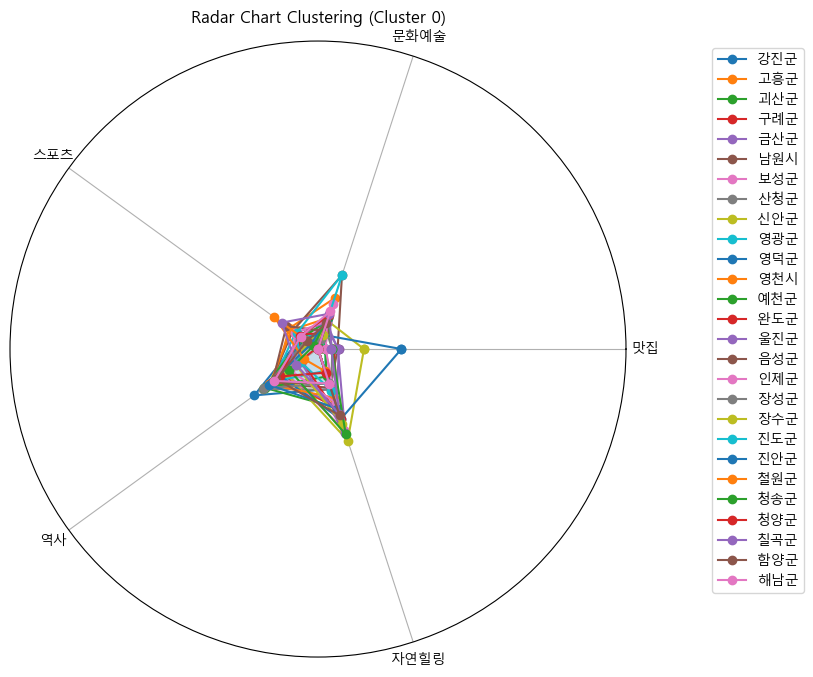

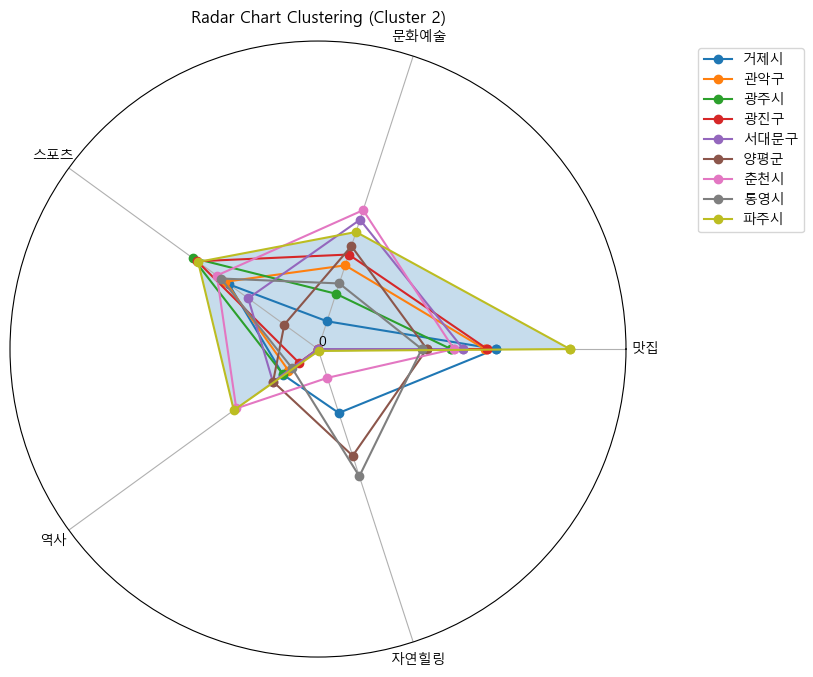

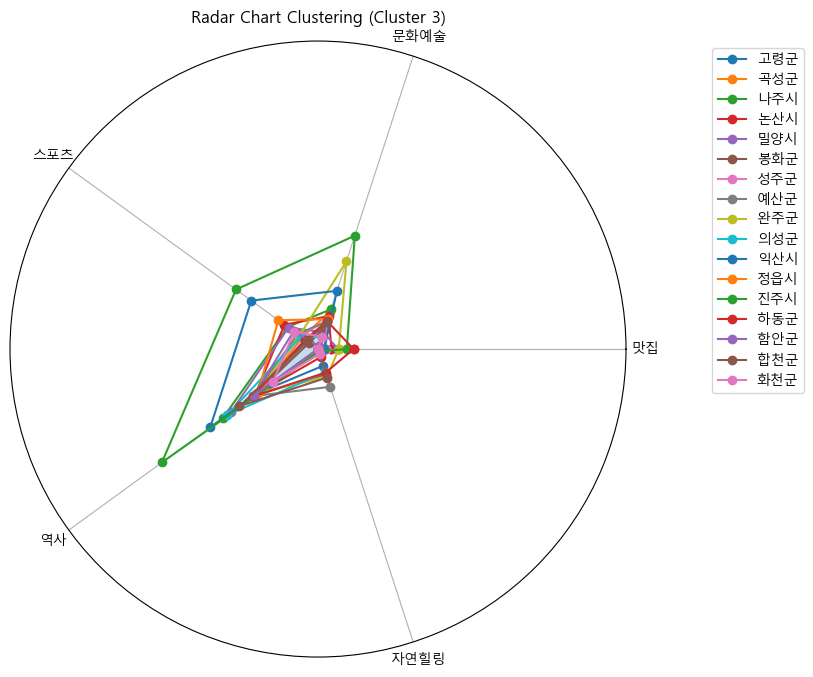

In [1]:
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import font_manager, rc

#dataset loading
df = pd.read_csv('피벗_ver4.csv')

df_data = df.pivot(index='지역', columns='피벗 필드명', values='피벗 필드값')

# K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(df_data)

# add clustering result to the df
df_data['Cluster'] = labels

# drawing radar chart by clusters
clusters = df_data['Cluster'].unique()
for cluster in clusters:
    cluster_df = df_data[df_data['Cluster'] == cluster].drop(columns='Cluster')
    
    num_features = len(cluster_df.columns)
    angles = [n / float(num_features) * 2 * pi for n in range(num_features)]
    angles += angles[:1] 
    rc('font', family='Malgun Gothic')

    plt.figure(figsize=(8, 8))
    for index, row in cluster_df.iterrows():
        values = row.tolist()
        values += values[:1]
        plt.polar(angles, values, marker='o', label=index)

    plt.fill(angles, values, alpha=0.25)
    plt.title(f'Radar Chart Clustering (Cluster {cluster})')
    plt.xticks(angles[:-1], cluster_df.columns)
    plt.yticks(np.arange(0, 101, 20))
    plt.ylim(0, 4) #plt.ylim(0, 1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.show()


In [2]:
df_data['Cluster'] = labels

# 클러스터링 결과를 리스트로 만듭니다.
clustering_results = df_data['Cluster'].tolist()

len(clustering_results)

69

In [3]:
data = pd.read_csv('전처리 ver4.csv')
data

,시군구,스포츠,역사,자연힐링,문화예술,맛집
0,고령군,0.199261,0.982022,0.226923,0.337923,0.000000
1,해남군,0.276784,0.703288,0.470593,0.515284,0.000000
2,사하구,0.998684,0.086120,0.452713,0.739517,0.269302
3,보성군,0.147164,0.518944,1.101128,0.618244,0.088635
4,곡성군,0.257912,0.862163,0.020495,0.507587,0.000000
...,...,...,...,...,...,...
64,거제시,1.429258,0.563750,0.873035,0.379291,2.310941
65,진안군,0.111728,0.788030,0.814749,0.419833,0.000000
66,예천군,0.251843,0.866217,0.373077,0.379469,0.091990
67,합천군,0.169279,1.261250,0.388902,0.368017,0.000000


In [4]:
result=data.copy()
result['클러스터']=clustering_results
result

,시군구,스포츠,역사,자연힐링,문화예술,맛집,클러스터
0,고령군,0.199261,0.982022,0.226923,0.337923,0.000000,1
1,해남군,0.276784,0.703288,0.470593,0.515284,0.000000,0
2,사하구,0.998684,0.086120,0.452713,0.739517,0.269302,2
3,보성군,0.147164,0.518944,1.101128,0.618244,0.088635,3
4,곡성군,0.257912,0.862163,0.020495,0.507587,0.000000,0
...,...,...,...,...,...,...,...
64,거제시,1.429258,0.563750,0.873035,0.379291,2.310941,3
65,진안군,0.111728,0.788030,0.814749,0.419833,0.000000,0
66,예천군,0.251843,0.866217,0.373077,0.379469,0.091990,3
67,합천군,0.169279,1.261250,0.388902,0.368017,0.000000,0


In [5]:
result['클러스터'].value_counts()

0    27
3    17
1    16
2     9
Name: 클러스터, dtype: int64

In [7]:
result.to_csv('클러스터링.csv', index=False)